# Take Sentiment Analysis dataframes and apply part of speech analysis 
(new notebook to save space and allow for quick analysis)

In [1]:
import pandas as pd
unicode_errors= pd.read_csv('./datasets/unicode_errors.csv')

In [2]:
#first lets look at the dataset that shows the sentiments of ONLY those that weren't able
#to be analyzed by unicode analysis

In [3]:
unicode_errors.head()

,Unnamed: 0,type,i_e,s_n,t_f,j_p,posts,clean_post,vader_neg,vader_pos,vader_neu,vader_compound,cleaned
0,2,INTP,0,1,0,1,'Good one _____ https://www.youtube.com/wat...,'good one _____ https://www.youtube.com/wat...,0.073,0.174,0.753,0.9982,error not unicode
1,6,INFJ,0,1,1,0,"'No, I can't draw on my own nails (haha). Thos...","'no, i can't draw on my own nails (haha). thos...",0.116,0.167,0.717,0.9974,error not unicode
2,11,ENFJ,1,1,1,0,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...,'https://www.youtube.com/watch?v=plaaikvhvzs51...,0.083,0.200,0.717,0.9989,error not unicode
3,21,INFJ,0,1,1,0,'It is very annoying to be misinterpreted. Esp...,'it is very annoying to be misinterpreted. esp...,0.121,0.146,0.732,0.9936,error not unicode
4,33,INFJ,0,1,1,0,'Sometimes I wonder that too.. the reason bein...,'sometimes i wonder that too.. the reason bein...,0.092,0.181,0.727,0.9993,error not unicode


In [4]:
df = unicode_errors.drop(unicode_errors[['Unnamed: 0','posts','cleaned']],axis=1)

In [5]:
df.head()

,type,i_e,s_n,t_f,j_p,clean_post,vader_neg,vader_pos,vader_neu,vader_compound
0,INTP,0,1,0,1,'good one _____ https://www.youtube.com/wat...,0.073,0.174,0.753,0.9982
1,INFJ,0,1,1,0,"'no, i can't draw on my own nails (haha). thos...",0.116,0.167,0.717,0.9974
2,ENFJ,1,1,1,0,'https://www.youtube.com/watch?v=plaaikvhvzs51...,0.083,0.200,0.717,0.9989
3,INFJ,0,1,1,0,'it is very annoying to be misinterpreted. esp...,0.121,0.146,0.732,0.9936
4,INFJ,0,1,1,0,'sometimes i wonder that too.. the reason bein...,0.092,0.181,0.727,0.9993


In [6]:
df.columns

Index([u'type', u'i_e', u's_n', u't_f', u'j_p', u'clean_post', u'vader_neg',
       u'vader_pos', u'vader_neu', u'vader_compound'],
      dtype='object')

In [7]:
df = df[['type', u'i_e', u's_n', u't_f', u'j_p', u'vader_neg',
       u'vader_pos', u'vader_neu', u'vader_compound',u'clean_post']]

In [8]:
df.head()

,type,i_e,s_n,t_f,j_p,vader_neg,vader_pos,vader_neu,vader_compound,clean_post
0,INTP,0,1,0,1,0.073,0.174,0.753,0.9982,'good one _____ https://www.youtube.com/wat...
1,INFJ,0,1,1,0,0.116,0.167,0.717,0.9974,"'no, i can't draw on my own nails (haha). thos..."
2,ENFJ,1,1,1,0,0.083,0.200,0.717,0.9989,'https://www.youtube.com/watch?v=plaaikvhvzs51...
3,INFJ,0,1,1,0,0.121,0.146,0.732,0.9936,'it is very annoying to be misinterpreted. esp...
4,INFJ,0,1,1,0,0.092,0.181,0.727,0.9993,'sometimes i wonder that too.. the reason bein...


In [9]:
mid = pd.read_csv('./datasets/mid_cleaned_data.csv')

In [10]:
mid.head()

,Unnamed: 0,type,i_e,s_n,t_f,j_p,posts,clean_post,vader_neg,vader_pos,vader_neu,vader_compound,cleaned
0,0,INFJ,0,1,1,0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krwhtt...,0.055,0.114,0.831,0.9844,url and intj moments url sportscenter not top ...
1,1,ENTP,1,1,0,1,'I'm finding the lack of me in these posts ver...,'i'm finding the lack of me in these posts ver...,0.073,0.167,0.761,0.9987,im finding the lack of me in these posts very ...
2,2,INTP,0,1,0,1,'Good one _____ https://www.youtube.com/wat...,'good one _____ https://www.youtube.com/wat...,0.574,0.000,0.426,-0.4019,error not unicode
3,3,INTJ,0,1,0,0,"'Dear INTP, I enjoyed our conversation the o...","'dear intp, i enjoyed our conversation the o...",0.057,0.116,0.827,0.9966,dear intp i enjoyed our conversation the other...
4,4,ENTJ,1,1,0,0,'You're fired.|||That's another silly misconce...,'you're fired.that's another silly misconcepti...,0.125,0.137,0.738,0.8822,youre firedthats another silly misconception t...


In [11]:
df_part2 = mid.drop(mid[['Unnamed: 0','posts','clean_post']],axis=1)

In [12]:
df_part2.columns

Index([u'type', u'i_e', u's_n', u't_f', u'j_p', u'vader_neg', u'vader_pos',
       u'vader_neu', u'vader_compound', u'cleaned'],
      dtype='object')

In [13]:
df_part2.columns = [u'type', u'i_e', u's_n', u't_f', u'j_p', u'vader_neg', u'vader_pos',
       u'vader_neu', u'vader_compound', u'clean_post']

In [14]:
df_part2.columns

Index([u'type', u'i_e', u's_n', u't_f', u'j_p', u'vader_neg', u'vader_pos',
       u'vader_neu', u'vader_compound', u'clean_post'],
      dtype='object')

In [15]:
df.head()

,type,i_e,s_n,t_f,j_p,vader_neg,vader_pos,vader_neu,vader_compound,clean_post
0,INTP,0,1,0,1,0.073,0.174,0.753,0.9982,'good one _____ https://www.youtube.com/wat...
1,INFJ,0,1,1,0,0.116,0.167,0.717,0.9974,"'no, i can't draw on my own nails (haha). thos..."
2,ENFJ,1,1,1,0,0.083,0.200,0.717,0.9989,'https://www.youtube.com/watch?v=plaaikvhvzs51...
3,INFJ,0,1,1,0,0.121,0.146,0.732,0.9936,'it is very annoying to be misinterpreted. esp...
4,INFJ,0,1,1,0,0.092,0.181,0.727,0.9993,'sometimes i wonder that too.. the reason bein...


In [16]:
df_part2.head()

,type,i_e,s_n,t_f,j_p,vader_neg,vader_pos,vader_neu,vader_compound,clean_post
0,INFJ,0,1,1,0,0.055,0.114,0.831,0.9844,url and intj moments url sportscenter not top ...
1,ENTP,1,1,0,1,0.073,0.167,0.761,0.9987,im finding the lack of me in these posts very ...
2,INTP,0,1,0,1,0.574,0.000,0.426,-0.4019,error not unicode
3,INTJ,0,1,0,0,0.057,0.116,0.827,0.9966,dear intp i enjoyed our conversation the other...
4,ENTJ,1,1,0,0,0.125,0.137,0.738,0.8822,youre firedthats another silly misconception t...


In [17]:
unicode1 = df_part2['clean_post'] != "error not unicode"

In [18]:
df_part2 = df_part2[unicode1]

In [19]:
df_part2.head()

,type,i_e,s_n,t_f,j_p,vader_neg,vader_pos,vader_neu,vader_compound,clean_post
0,INFJ,0,1,1,0,0.055,0.114,0.831,0.9844,url and intj moments url sportscenter not top ...
1,ENTP,1,1,0,1,0.073,0.167,0.761,0.9987,im finding the lack of me in these posts very ...
3,INTJ,0,1,0,0,0.057,0.116,0.827,0.9966,dear intp i enjoyed our conversation the other...
4,ENTJ,1,1,0,0,0.125,0.137,0.738,0.8822,youre firedthats another silly misconception t...
5,INTJ,0,1,0,0,0.084,0.132,0.785,0.9965,1837 science is not perfect no scientist claim...


### Take the "error" dataframe, analyze based on the less-clean data, and then combine with the clean_data dataframe

In [20]:
df = pd.concat([df,df_part2])

In [21]:
df.head()

,type,i_e,s_n,t_f,j_p,vader_neg,vader_pos,vader_neu,vader_compound,clean_post
0,INTP,0,1,0,1,0.073,0.174,0.753,0.9982,'good one _____ https://www.youtube.com/wat...
1,INFJ,0,1,1,0,0.116,0.167,0.717,0.9974,"'no, i can't draw on my own nails (haha). thos..."
2,ENFJ,1,1,1,0,0.083,0.200,0.717,0.9989,'https://www.youtube.com/watch?v=plaaikvhvzs51...
3,INFJ,0,1,1,0,0.121,0.146,0.732,0.9936,'it is very annoying to be misinterpreted. esp...
4,INFJ,0,1,1,0,0.092,0.181,0.727,0.9993,'sometimes i wonder that too.. the reason bein...


In [41]:
df.to_csv('./df_sent.csv')

## Show Sentiment & Part of Speech Counts

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Text(0.5,0,u'Negativity')

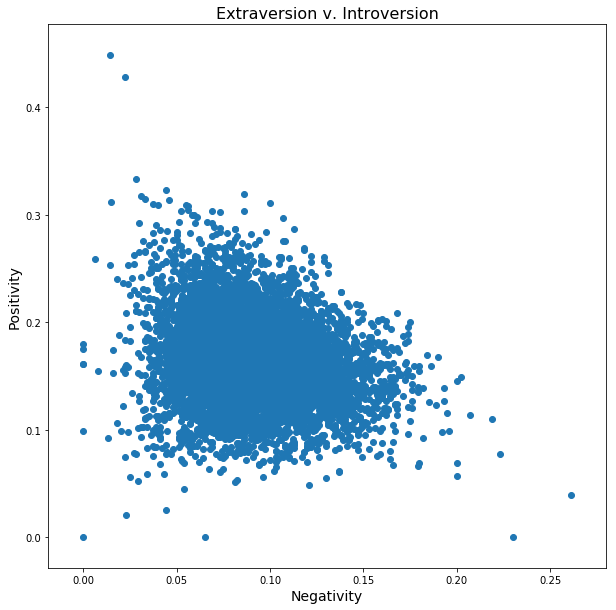

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.scatter(x=df.vader_neg, y=df.vader_pos, cmap=df['i_e'])

ax.set_title("Extraversion v. Introversion",fontsize=16)


ax.set_ylabel("Positivity",fontsize=14)
ax.set_xlabel("Negativity",fontsize=14)

Text(21.2834,0.5,u'Overall Negative Sentiment of Post')

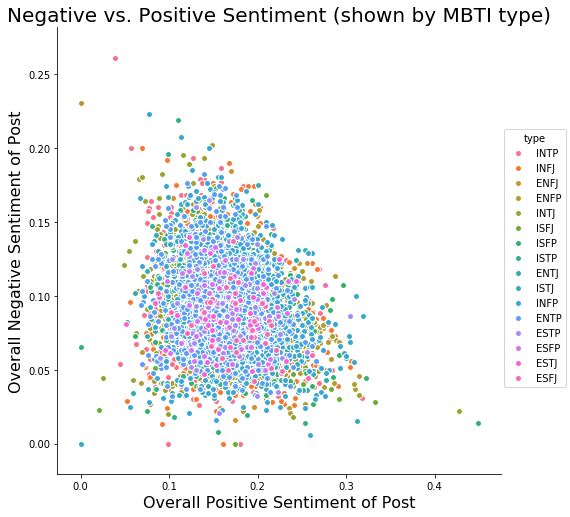

In [27]:
ax = sns.pairplot(df, x_vars = ['vader_pos'], y_vars = ['vader_neg'], hue = 'type',size=7)
plt.title('Negative vs. Positive Sentiment (shown by MBTI type)', fontsize=20)
plt.xlabel('Overall Positive Sentiment of Post',fontsize=16)
plt.ylabel('Overall Negative Sentiment of Post',fontsize=16)

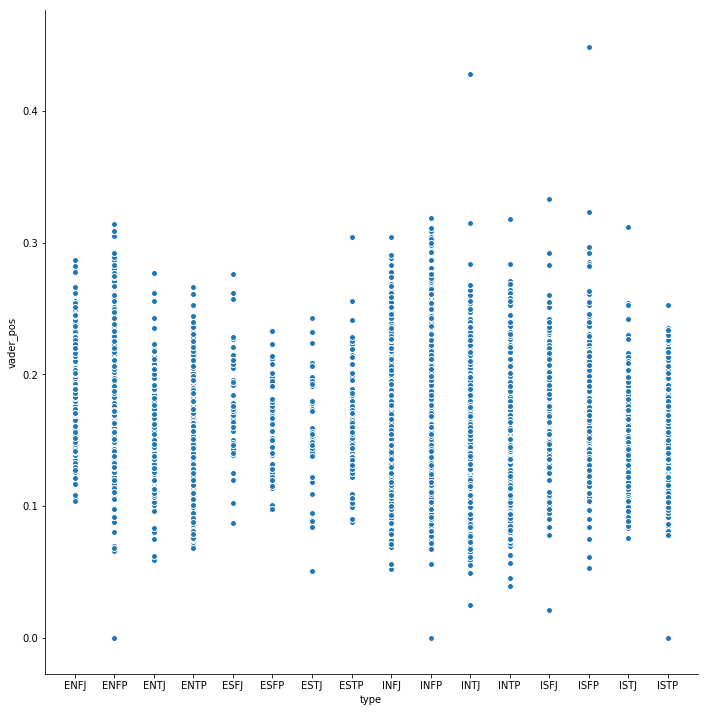

In [39]:
sns.pairplot(df, x_vars = ['type'], y_vars = ['vader_pos'], size=10)

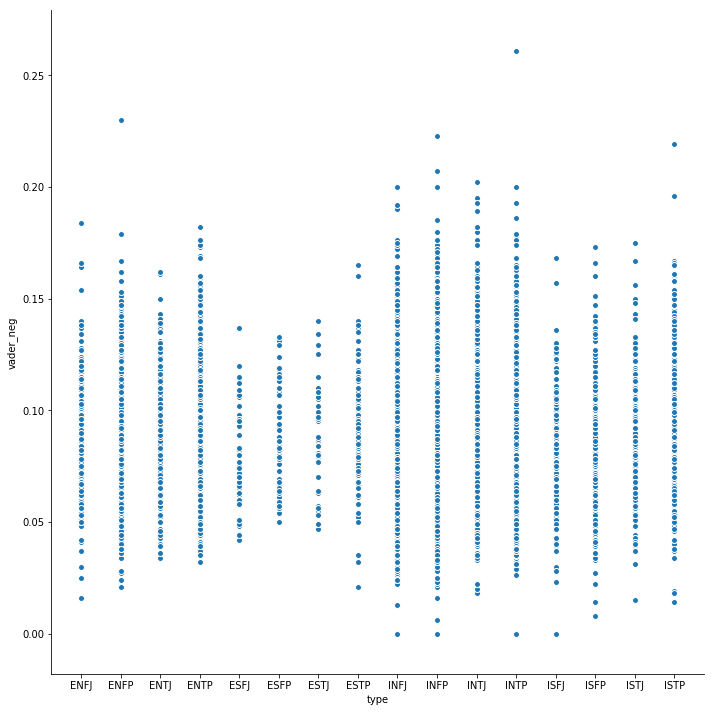

In [40]:
sns.pairplot(df, x_vars = ['type'], y_vars = ['vader_neg'], size=10)

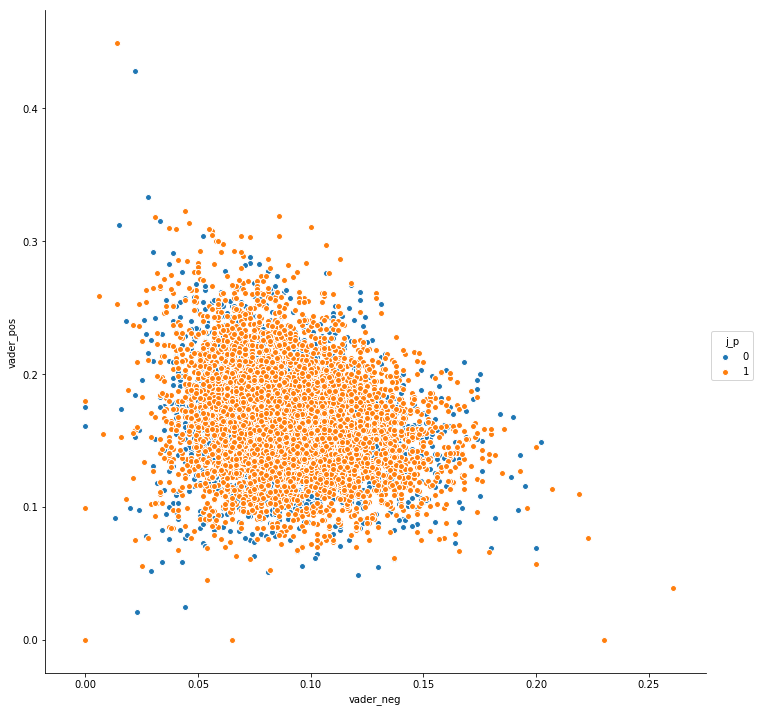

In [28]:
sns.pairplot(df, x_vars = ['vader_neg'], y_vars = ['vader_pos'], hue='j_p', size=10)

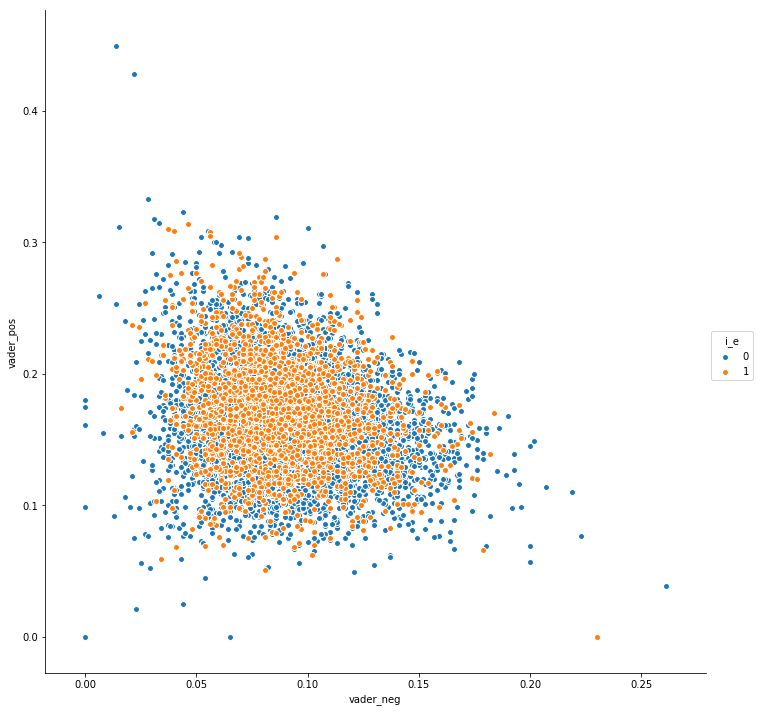

In [29]:
sns.pairplot(df, x_vars = ['vader_neg'], y_vars = ['vader_pos'], hue='i_e', size=10)

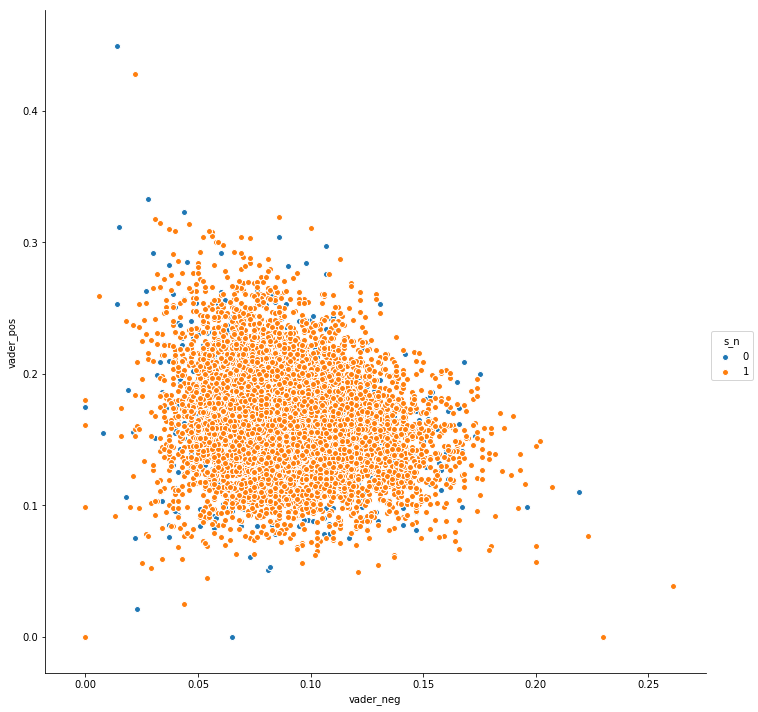

In [31]:
sns.pairplot(df, x_vars = ['vader_neg'], y_vars = ['vader_pos'], hue='s_n', size=10)

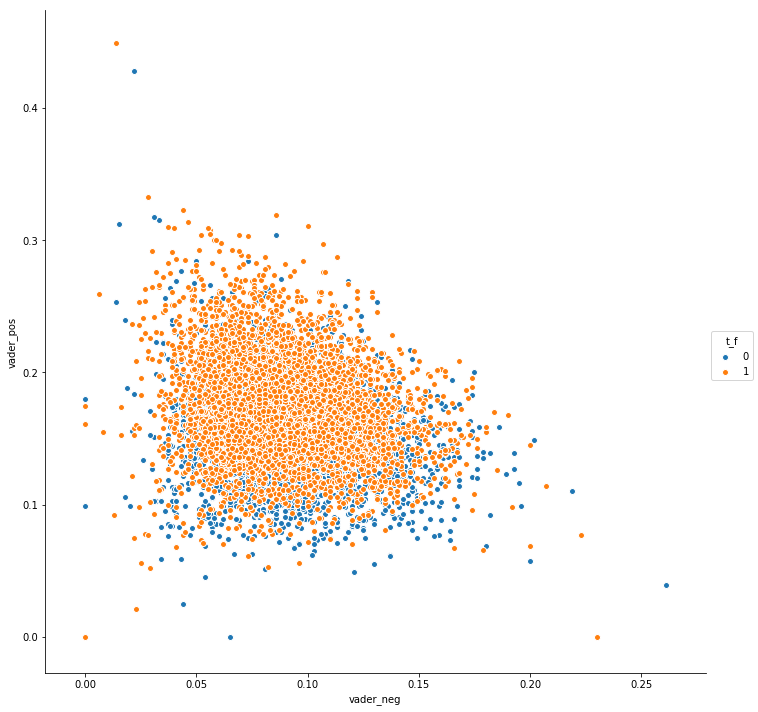

In [33]:
sns.pairplot(df, x_vars = ['vader_neg'], y_vars = ['vader_pos'], hue='t_f', size=10)